In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [10]:
tesla = yf.Ticker("TSLA")

In [12]:
tesla_history = tesla.history(period="1y")  # for 1 year
print(tesla_history)

                                 Open        High         Low       Close  \
Date                                                                        
2023-11-14 00:00:00-05:00  235.029999  238.139999  230.720001  237.410004   
2023-11-15 00:00:00-05:00  239.289993  246.699997  236.449997  242.839996   
2023-11-16 00:00:00-05:00  239.490005  240.880005  230.960007  233.589996   
2023-11-17 00:00:00-05:00  232.000000  237.389999  226.539993  234.300003   
2023-11-20 00:00:00-05:00  234.039993  237.100006  231.020004  235.600006   
...                               ...         ...         ...         ...   
2024-11-08 00:00:00-05:00  299.140015  328.709991  297.660004  321.220001   
2024-11-11 00:00:00-05:00  346.299988  358.640015  336.000000  350.000000   
2024-11-12 00:00:00-05:00  342.739990  345.839996  323.309998  328.489990   
2024-11-13 00:00:00-05:00  335.850006  344.600006  322.500000  330.239990   
2024-11-14 00:00:00-05:00  327.665009  329.980011  310.369995  314.250000   

In [14]:
# Use the history method to get data for the maximum available period
tesla_data = tesla.history(period="max")

# Reset the index to turn the Date index into a column
tesla_data.reset_index(inplace=True)


In [16]:
# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [18]:
# Extract Tesla's financials (which include revenue data)
tesla_financials = tesla.financials

# You may want to filter out revenue data specifically
tesla_revenue = tesla_financials.loc['Total Revenue']

In [24]:
print(tesla_revenue.tail())

2023-12-31    96773000000.0
2022-12-31    81462000000.0
2021-12-31    53823000000.0
2020-12-31    31536000000.0
2019-12-31              NaN
Name: Total Revenue, dtype: object


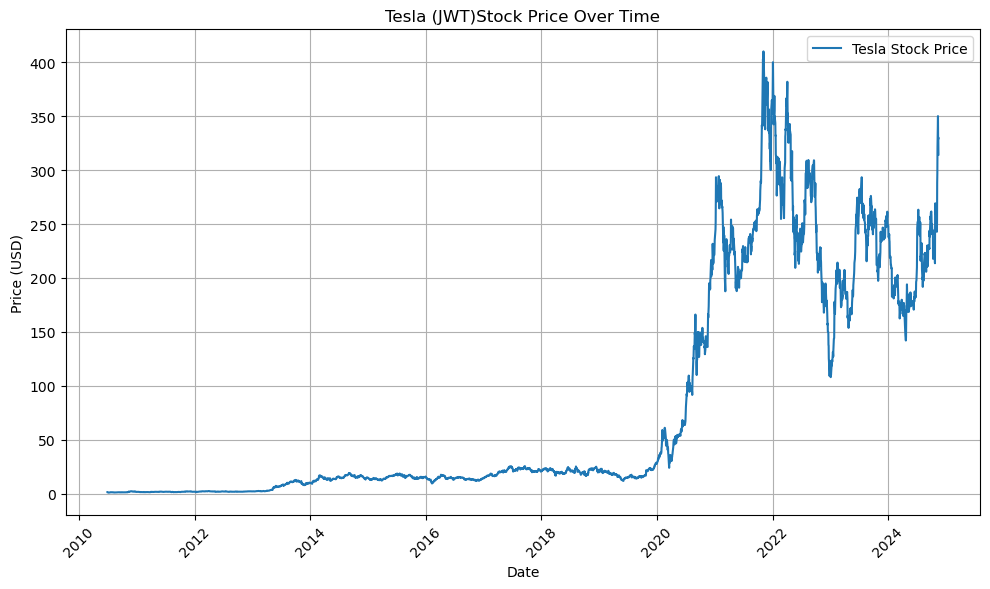

In [22]:
# Plotting the Tesla stock data (e.g., 'Close' price)
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price')
plt.title('Tesla (JWT)Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
gme = yf.Ticker("GME")

In [ ]:
gme_history = gme.history(period="1y")  # for 1 year
print(gme_history)

In [ ]:
# Use the history method to get data for the maximum available period
gme_data = gme.history(period="max")

# Reset the index to turn the Date index into a column
gme_data.reset_index(inplace=True)


In [ ]:
# Display the first five rows of the DataFrame
print(gme_data.head())

In [ ]:
# Extract GME's financials (which include revenue data)
gme_financials = gme.financials

# You may want to filter out revenue data specifically
gme_revenue = gme_financials.loc['Total Revenue']

In [ ]:
print(gme_revenue.tail())

In [ ]:
# Plotting the GameStop stock data (e.g., 'Close' price)
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 6))
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price')
plt.title('GameStop (JWT)Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()